# Binary Classification with a Software Defects Dataset
Your Goal: Predict defects in C programs given various various attributes about the code.

https://www.kaggle.com/competitions/playground-series-s3e23/overview

## Imports

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [58]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.000000,3.000000,1.000000,2.000000,60.000000,278.630000,0.060000,19.560000,14.250000,...,17,1,1,0,16.000000,9.000000,38.000000,22.000000,5.000000,False
1,1,14.000000,2.000000,1.000000,2.000000,32.000000,151.270000,0.140000,7.000000,21.110000,...,11,0,1,0,11.000000,11.000000,18.000000,14.000000,3.000000,False
2,2,11.000000,2.000000,1.000000,2.000000,45.000000,197.650000,0.110000,8.050000,22.760000,...,8,0,1,0,12.000000,11.000000,28.000000,17.000000,3.000000,False
3,3,8.000000,1.000000,1.000000,1.000000,23.000000,94.010000,0.190000,5.250000,17.860000,...,4,0,2,0,8.000000,6.000000,16.000000,7.000000,1.000000,True
4,4,11.000000,2.000000,1.000000,2.000000,17.000000,60.940000,0.180000,5.630000,12.440000,...,7,0,2,0,7.000000,6.000000,10.000000,10.000000,3.000000,False


In [59]:
df_train=df_train.drop(['id'],axis=1)

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [61]:
df_train.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [62]:
df_train.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,20853.589876,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,190571.405427,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,564.730000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2256.230000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,10193.240000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,16846621.120000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [63]:
pd.set_option('float_format', '{:f}'.format)

In [64]:
# checking the variance of the data
df_train.var()

loc                        2981.203824
v(g)                         62.423511
ev(g)                        21.448584
iv(g)                        30.631145
n                         29291.360964
v                       1614911.293984
l                             0.010019
d                           199.411281
i                           522.430662
e                   36317460566.283279
b                             0.177953
t                      97274734.515400
lOCode                     1485.409423
lOComment                    34.838465
lOBlank                      40.734496
locCodeAndComment             0.997814
uniq_Op                      45.556417
uniq_Opnd                   326.317523
total_Op                  10928.122408
total_Opnd                 5139.787142
branchCount                 207.727916
defects                       0.175278
dtype: float64

#### Apparently they'll need standardization later on using our StandardScaler, let's check the correlation

In [65]:
corr = df_train.corr()
corr

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.761509,0.544569,0.696327,0.759605,0.758069,-0.388018,0.599474,0.486427,0.501281,...,0.803460,0.528029,0.670751,0.246244,0.367068,0.637582,0.764612,0.761662,0.762755,0.342642
v(g),0.761509,1.000000,0.729249,0.790553,0.631041,0.618267,-0.387270,0.574305,0.304531,0.430184,...,0.641835,0.379520,0.461759,0.208324,0.389917,0.532358,0.639125,0.606453,0.966702,0.301187
ev(g),0.544569,0.729249,1.000000,0.545255,0.390504,0.367697,-0.325488,0.357735,0.160594,0.275179,...,0.382541,0.292689,0.282293,0.164563,0.200460,0.279100,0.394963,0.372867,0.774752,0.259928
iv(g),0.696327,0.790553,0.545255,1.000000,0.589718,0.585134,-0.291631,0.487112,0.319971,0.394291,...,0.636895,0.337728,0.426030,0.178546,0.378869,0.550633,0.591597,0.567097,0.747870,0.245618
n,0.759605,0.631041,0.390504,0.589718,1.000000,0.928390,-0.300350,0.808291,0.725408,0.569544,...,0.911761,0.566374,0.775345,0.262916,0.618021,0.818994,0.963373,0.953080,0.626009,0.258080
v,0.758069,0.618267,0.367697,0.585134,0.928390,1.000000,-0.254087,0.748121,0.673386,0.582332,...,0.899258,0.531985,0.735278,0.242057,0.544283,0.798964,0.936446,0.942189,0.608678,0.231179
l,-0.388018,-0.387270,-0.325488,-0.291631,-0.300350,-0.254087,1.000000,-0.426309,-0.162300,-0.091764,...,-0.289713,-0.187982,-0.288838,-0.125480,-0.399440,-0.283644,-0.294469,-0.290559,-0.416185,-0.253237
d,0.599474,0.574305,0.357735,0.487112,0.808291,0.748121,-0.426309,1.000000,0.515402,0.471276,...,0.778856,0.486619,0.676297,0.268184,0.782781,0.690652,0.808275,0.784738,0.575155,0.241936
i,0.486427,0.304531,0.160594,0.319971,0.725408,0.673386,-0.162300,0.515402,1.000000,0.286149,...,0.677093,0.435828,0.654349,0.214151,0.527640,0.803330,0.702058,0.740201,0.313935,0.208577
e,0.501281,0.430184,0.275179,0.394291,0.569544,0.582332,-0.091764,0.471276,0.286149,1.000000,...,0.580089,0.328993,0.436276,0.124604,0.275824,0.414846,0.579018,0.566986,0.427110,0.095366


In [66]:
corr['defects'].sort_values(ascending=False)

defects              1.000000
loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
n                    0.258080
lOBlank              0.257819
total_Opnd           0.252752
lOCode               0.250604
total_Op             0.250533
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
b                    0.232594
v                    0.231179
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
t                    0.099592
e                    0.095366
l                   -0.253237
Name: defects, dtype: float64

#### t and e columns should be dropped since they don't help that much compared to other features, we should check our heatmap

<AxesSubplot: >

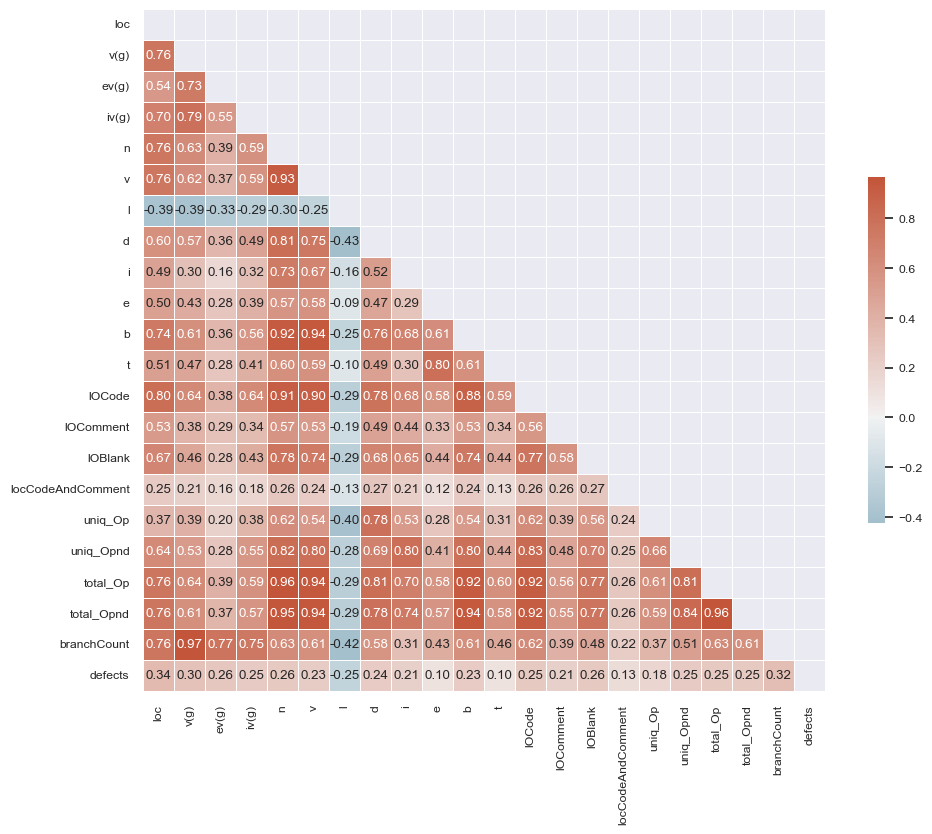

In [67]:
# plotting heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=0.8)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

#### As we can see there're a lot of features that are highly correlated to each other, they're like redundant info which won't help our model much so we should drop them.

In [68]:
# drop columns that have high correlation with at least 3 columns
columns_to_drop = []
for column in corr.columns:
    if (corr[column] > 0.9).sum() >= 3:
        columns_to_drop.append(column)

df_train_filtered = df_train.drop(columns_to_drop, axis=1)
df_train_filtered.head()

,loc,v(g),ev(g),iv(g),l,d,i,e,t,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,branchCount,defects
0,22.000000,3.000000,1.000000,2.000000,0.060000,19.560000,14.250000,5448.790000,302.710000,1,1,0,16.000000,9.000000,5.000000,False
1,14.000000,2.000000,1.000000,2.000000,0.140000,7.000000,21.110000,936.710000,52.040000,0,1,0,11.000000,11.000000,3.000000,False
2,11.000000,2.000000,1.000000,2.000000,0.110000,8.050000,22.760000,1754.010000,97.450000,0,1,0,12.000000,11.000000,3.000000,False
3,8.000000,1.000000,1.000000,1.000000,0.190000,5.250000,17.860000,473.660000,26.310000,0,2,0,8.000000,6.000000,1.000000,True
4,11.000000,2.000000,1.000000,2.000000,0.180000,5.630000,12.440000,365.670000,20.310000,0,2,0,7.000000,6.000000,3.000000,False


In [69]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   l                  101763 non-null  float64
 5   d                  101763 non-null  float64
 6   i                  101763 non-null  float64
 7   e                  101763 non-null  float64
 8   t                  101763 non-null  float64
 9   lOComment          101763 non-null  int64  
 10  lOBlank            101763 non-null  int64  
 11  locCodeAndComment  101763 non-null  int64  
 12  uniq_Op            101763 non-null  float64
 13  uniq_Opnd          101763 non-null  float64
 14  branchCount        101763 non-null  float64
 15  defects            101763 non-null  bool   
dtypes:

In [70]:
filtered_corr = df_train_filtered.corr()
filtered_corr['defects'].sort_values(ascending=False)

defects              1.000000
loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
lOBlank              0.257819
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
t                    0.099592
e                    0.095366
l                   -0.253237
Name: defects, dtype: float64

In [71]:
#dropp features with correlation between -0.1 and 0.1
#dropping features with correlation between -0.1 and 0.1
df_train_filtered = df_train_filtered.drop(filtered_corr[(filtered_corr['defects'] > -0.1) & (filtered_corr['defects'] < 0.1)].index, axis=1)
df_train_filtered.head()

,loc,v(g),ev(g),iv(g),l,d,i,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,branchCount,defects
0,22.000000,3.000000,1.000000,2.000000,0.060000,19.560000,14.250000,1,1,0,16.000000,9.000000,5.000000,False
1,14.000000,2.000000,1.000000,2.000000,0.140000,7.000000,21.110000,0,1,0,11.000000,11.000000,3.000000,False
2,11.000000,2.000000,1.000000,2.000000,0.110000,8.050000,22.760000,0,1,0,12.000000,11.000000,3.000000,False
3,8.000000,1.000000,1.000000,1.000000,0.190000,5.250000,17.860000,0,2,0,8.000000,6.000000,1.000000,True
4,11.000000,2.000000,1.000000,2.000000,0.180000,5.630000,12.440000,0,2,0,7.000000,6.000000,3.000000,False


In [72]:
filtered_corr = df_train_filtered.corr()
filtered_corr['defects'].sort_values(ascending=False)

defects              1.000000
loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
lOBlank              0.257819
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
l                   -0.253237
Name: defects, dtype: float64

#### I think we're good to go now, let's create a pairplot to check things out first.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


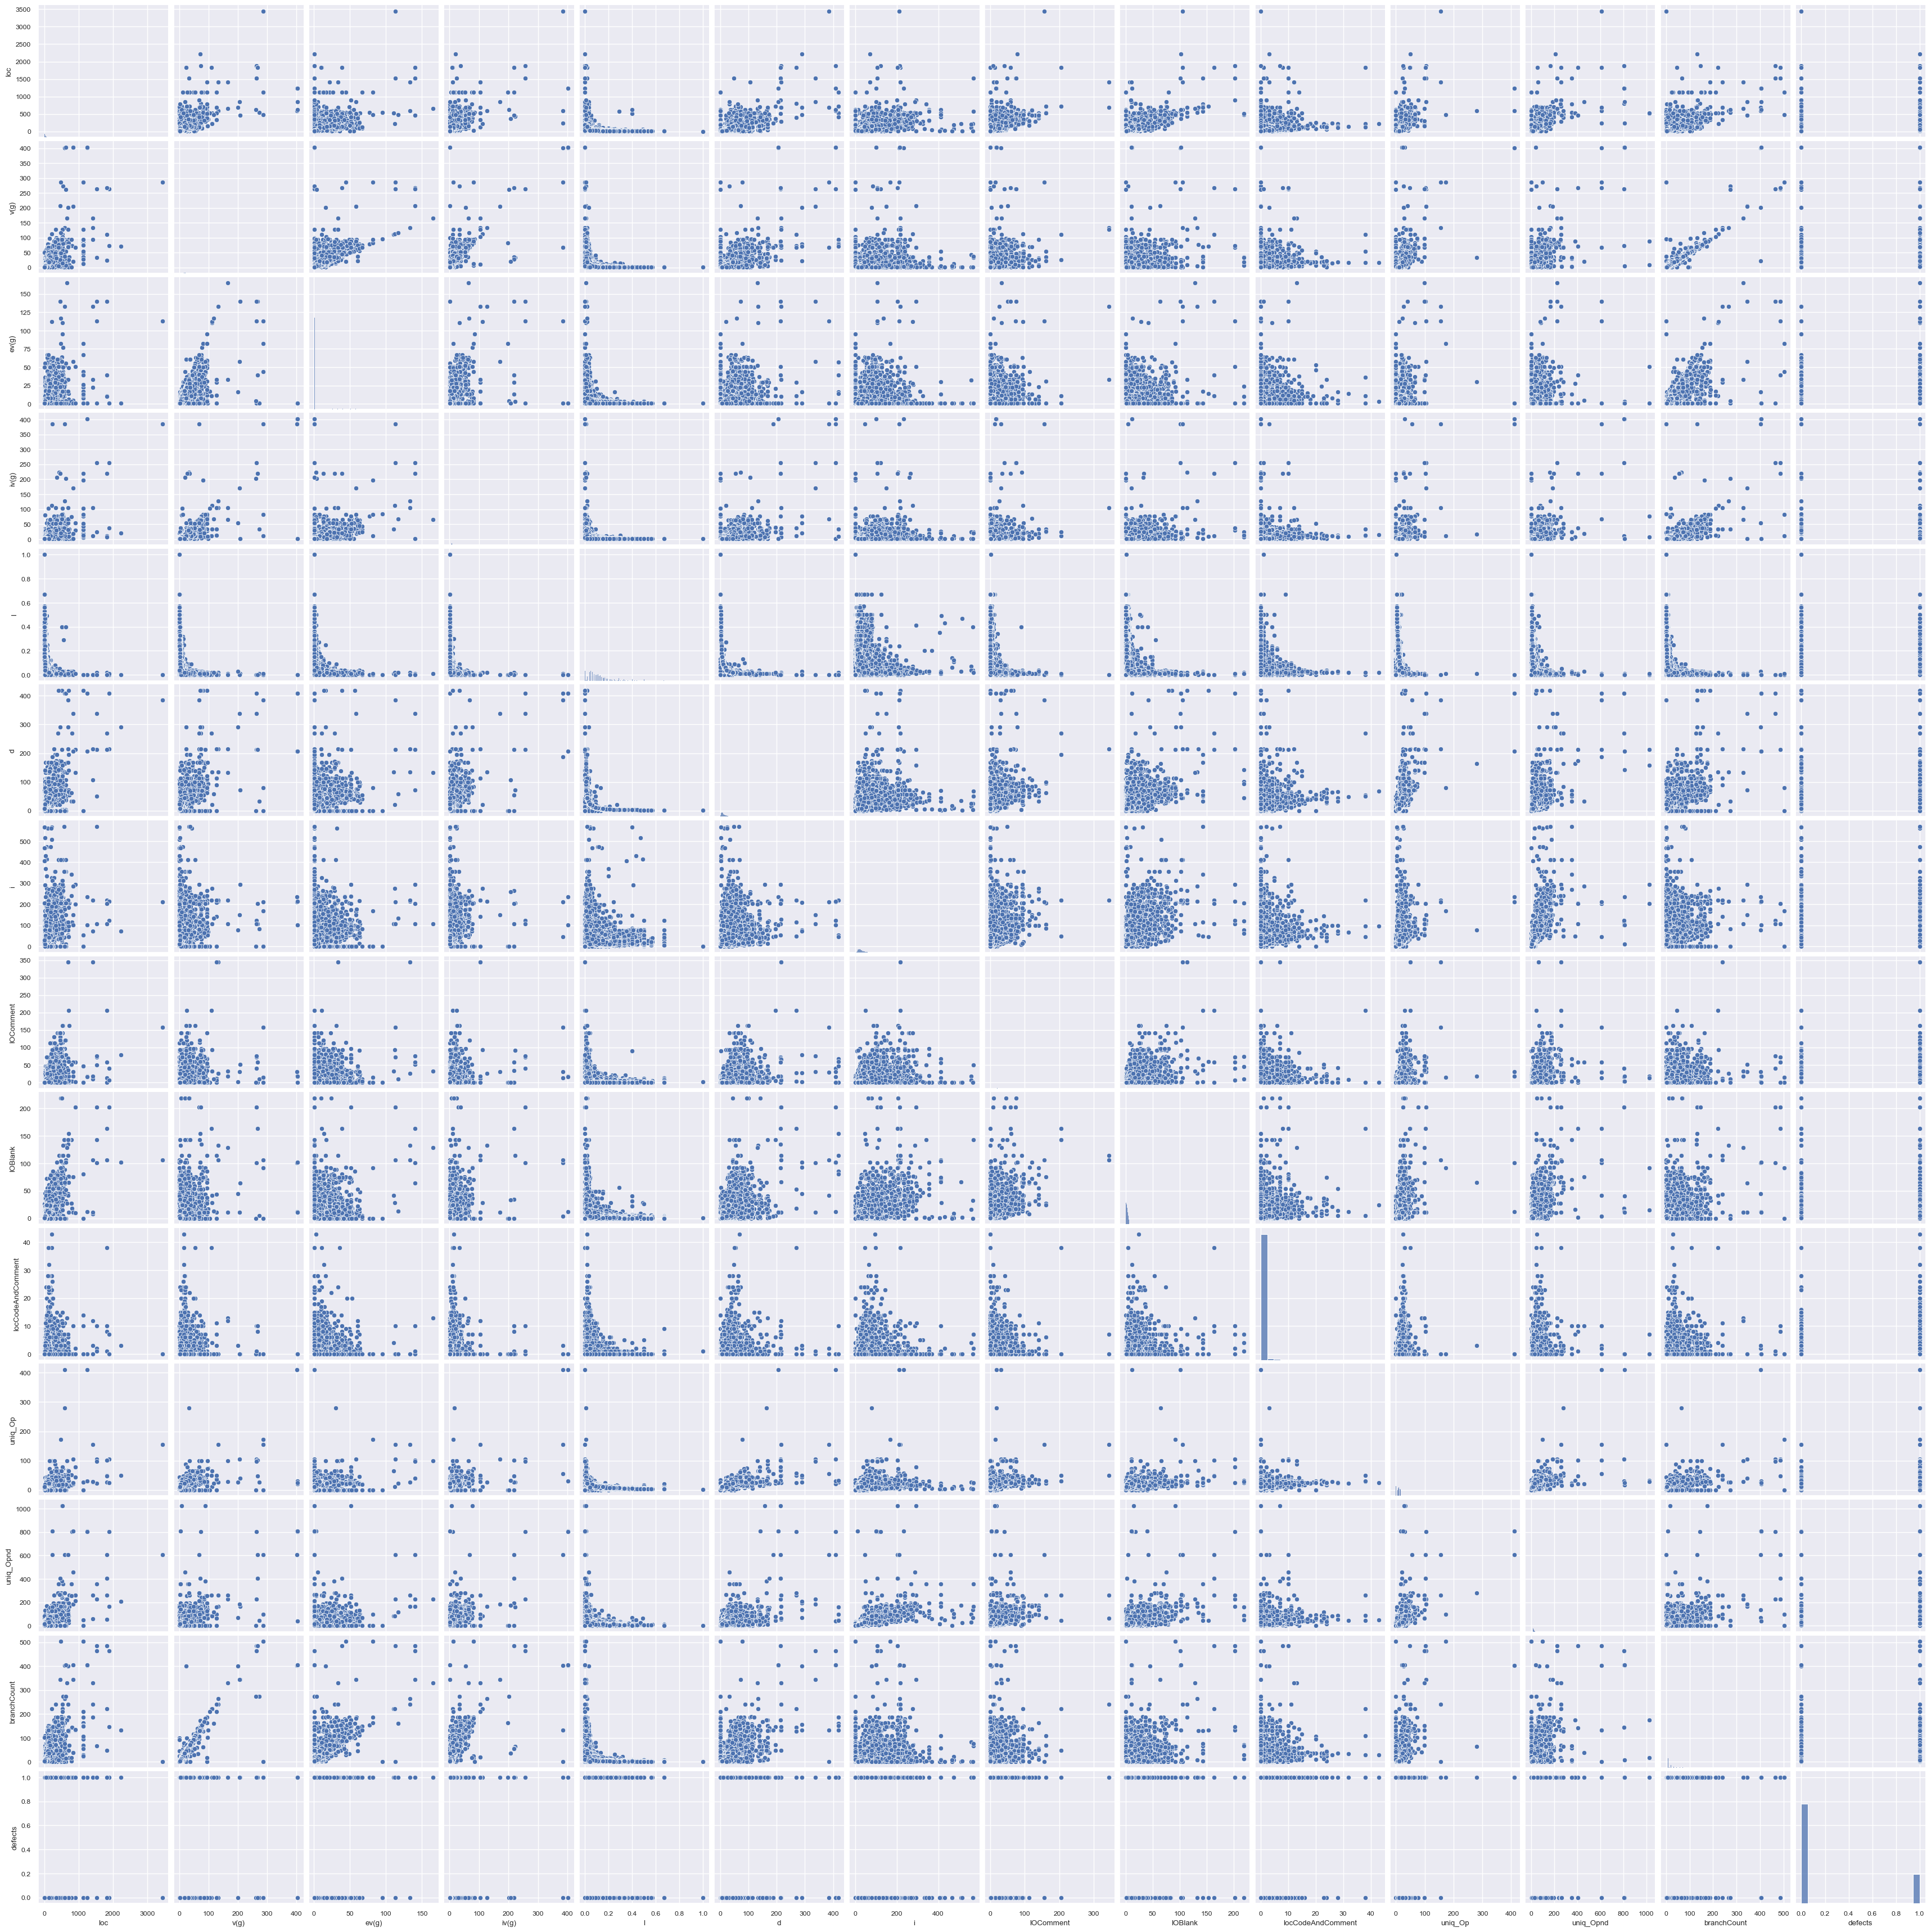

In [73]:
# create a pairplot to see the distribution of the data
sns.pairplot(df_train_filtered)

In [74]:
# convert defects to binary
df_train_filtered['defects'] = df_train_filtered['defects'].apply(lambda x: 1 if x == True else 0)
df_train_filtered.head()

,loc,v(g),ev(g),iv(g),l,d,i,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,branchCount,defects
0,22.000000,3.000000,1.000000,2.000000,0.060000,19.560000,14.250000,1,1,0,16.000000,9.000000,5.000000,0
1,14.000000,2.000000,1.000000,2.000000,0.140000,7.000000,21.110000,0,1,0,11.000000,11.000000,3.000000,0
2,11.000000,2.000000,1.000000,2.000000,0.110000,8.050000,22.760000,0,1,0,12.000000,11.000000,3.000000,0
3,8.000000,1.000000,1.000000,1.000000,0.190000,5.250000,17.860000,0,2,0,8.000000,6.000000,1.000000,1
4,11.000000,2.000000,1.000000,2.000000,0.180000,5.630000,12.440000,0,2,0,7.000000,6.000000,3.000000,0


#### Let's plot the distribution of our features according defectiveness

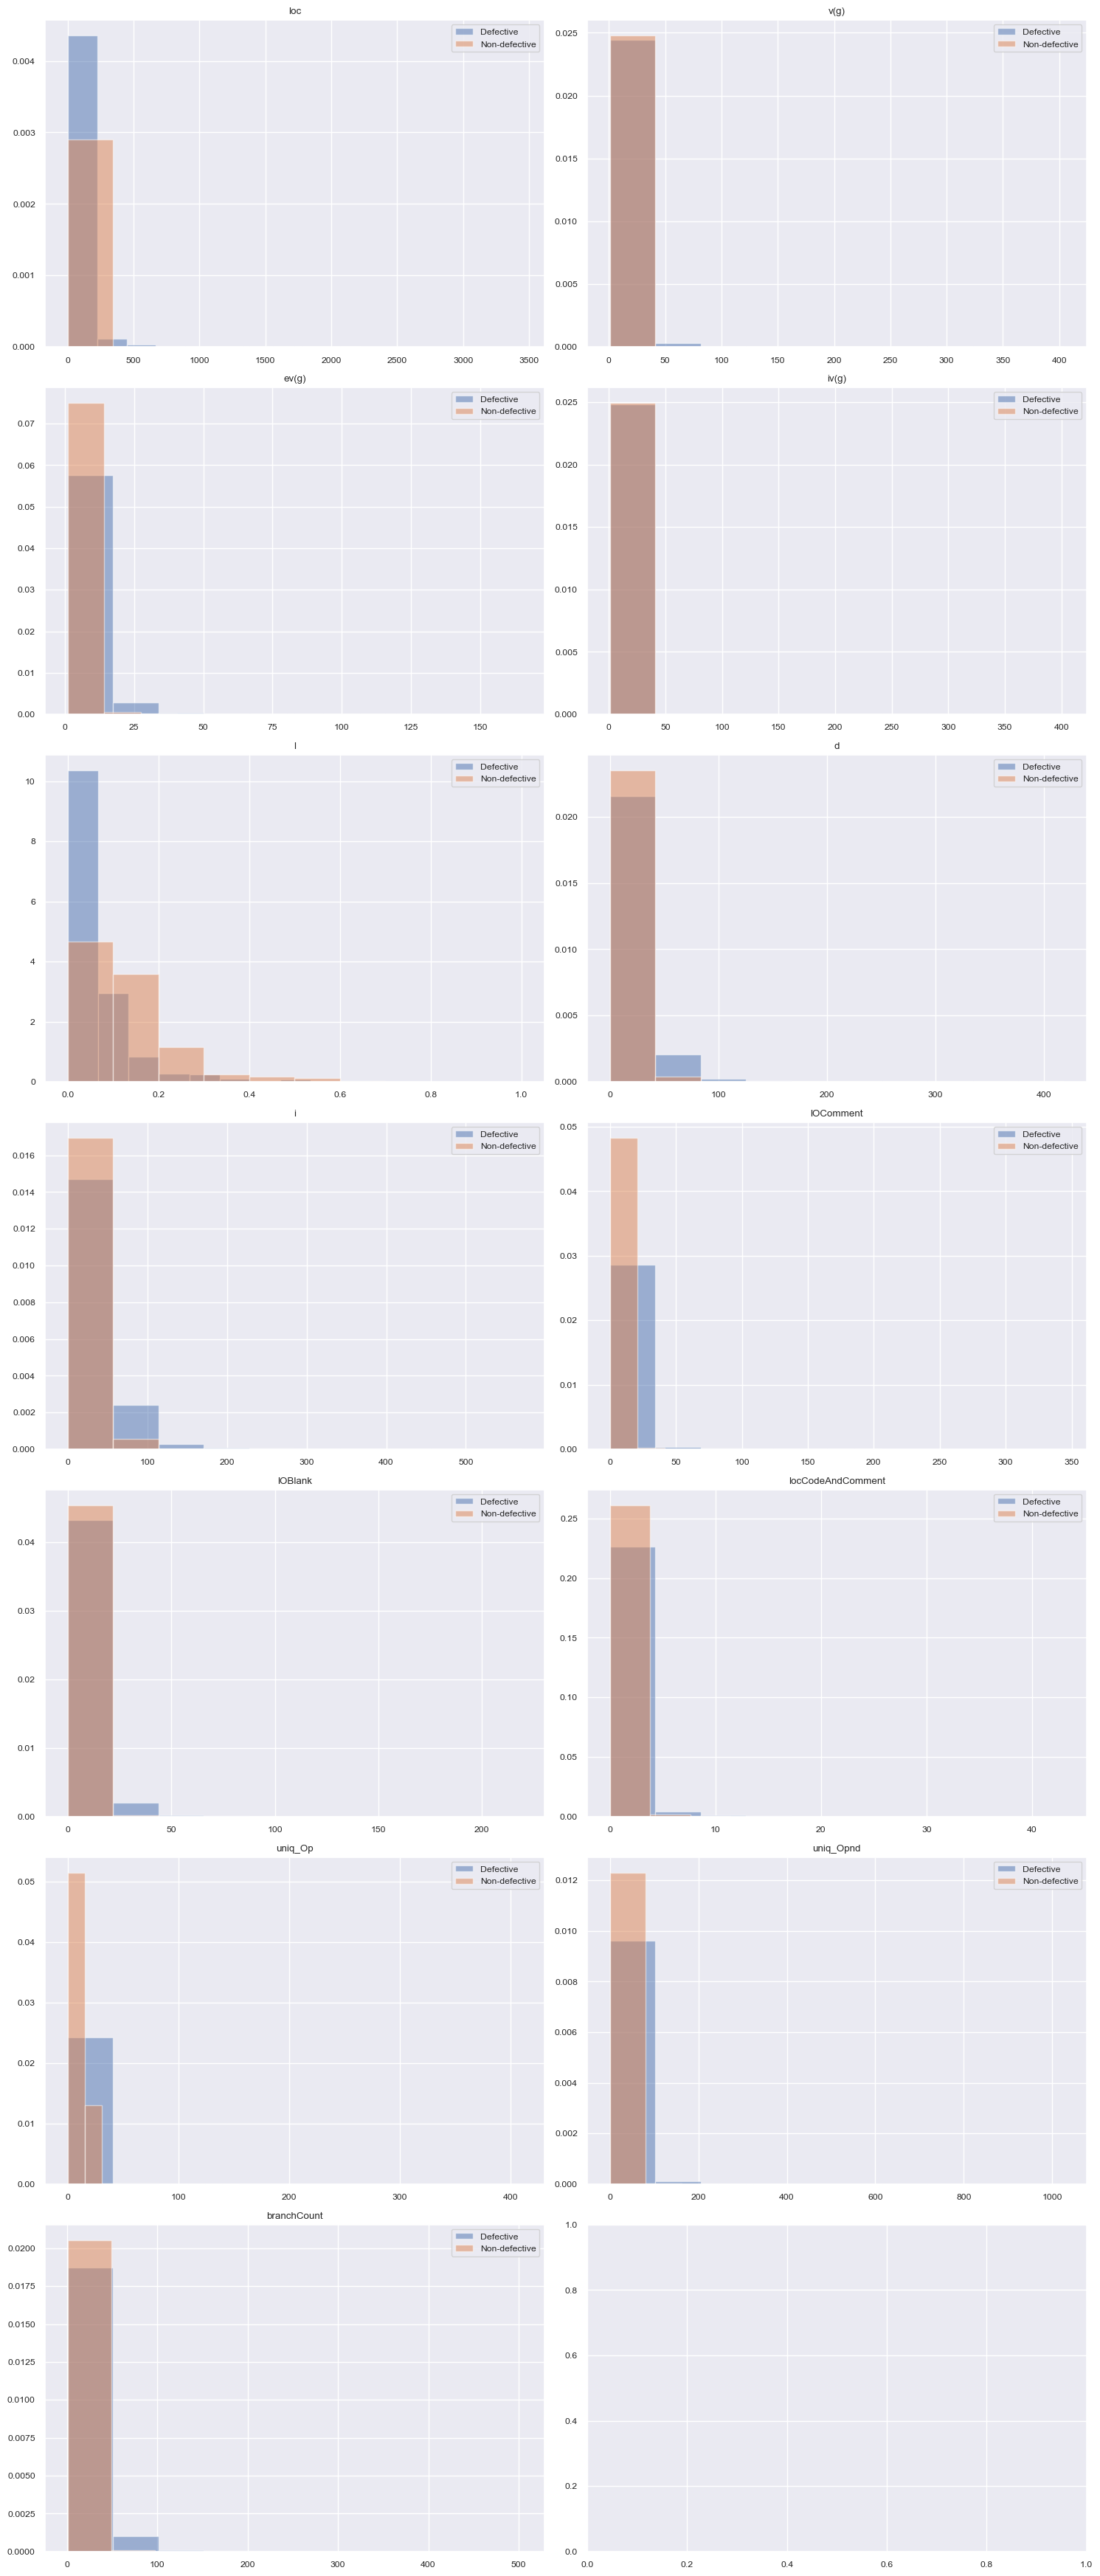

In [75]:
# plot the distribution of each features with defects in subplots
def plot_feature_distribution(df, feature_columns, target_column):
    num_features = len(feature_columns)
    num_plots_per_row = 2
    num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    
    for i, feature in enumerate(feature_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        ax = axs[row, col] if num_rows > 1 else axs[col]
        ax.hist(df[df[target_column] == 1][feature], label='Defective', alpha=0.5, density=True)
        ax.hist(df[df[target_column] == 0][feature], label='Non-defective', alpha=0.5, density=True)
        ax.set_title(feature)
        ax.legend()

    plt.tight_layout()
    plt.show()

feature_columns = df_train_filtered.columns.drop('defects')
target_column = 'defects'

plot_feature_distribution(df_train_filtered, feature_columns, target_column)


## Modeling
let's start creating our model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

#### Splitting data, making sure to stratify the splitting to y in order to balance the classes in both training and testing

In [77]:
# splitting the data into train and test
X = df_train_filtered.drop('defects', axis=1)
y = df_train_filtered['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

#### We'll create a pipeline with polynomialfeatures to get the best of our features, then we scale our data preparing it to go through PCA for dimensionality reduction, and then fit our Random Forest Classifier with a little hyperparameter tuning.

In [78]:
# Creating my pipeline which consists of polynomial features, standardscaling as a method for standardization, pca to create the principal components and random forest classifier as my chosen algorithm
rf_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0.001,n_jobs=-1,random_state=42))])
#fitting the pipeline
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('pca', PCA()),
                ('classifier',
                 RandomForestClassifier(min_weight_fraction_leaf=0.001,
                                        n_jobs=-1, random_state=42))])

#### Checking the explained variance ration our PCA got

In [79]:
print(rf_pipe[2].explained_variance_ratio_)

[3.83002406e-01 9.83239125e-02 6.67211909e-02 6.40802816e-02
 5.44741248e-02 4.87529071e-02 3.78771791e-02 2.62081189e-02
 2.23472375e-02 1.86726727e-02 1.77456129e-02 1.53826146e-02
 1.29284299e-02 1.22553321e-02 1.11672387e-02 9.40986959e-03
 7.97595769e-03 7.53473877e-03 6.23373978e-03 6.03654570e-03
 5.50211724e-03 4.74469913e-03 4.23283550e-03 3.99595977e-03
 3.40385115e-03 3.08187802e-03 2.95584303e-03 2.89041500e-03
 2.56721304e-03 2.43112690e-03 2.31587605e-03 2.08249626e-03
 1.97673696e-03 1.95804385e-03 1.84837826e-03 1.68226729e-03
 1.63173679e-03 1.56330748e-03 1.45814457e-03 1.36978078e-03
 1.25745751e-03 1.12120090e-03 1.03059834e-03 1.00952315e-03
 9.33678889e-04 8.36359474e-04 8.21912835e-04 7.96949274e-04
 7.37926538e-04 7.21374674e-04 6.77663447e-04 6.45793634e-04
 6.06414826e-04 5.30347543e-04 5.12404567e-04 4.76722421e-04
 4.45651225e-04 4.18454261e-04 3.91900575e-04 3.70450964e-04
 3.51349634e-04 3.33736447e-04 3.00718845e-04 2.76634230e-04
 2.64439009e-04 2.497356

#### Checking at which component should we be able to reach at least 0.9, looks like it's in the 17th component (0.90732509)

In [80]:
print(rf_pipe[2].explained_variance_ratio_.cumsum())

[0.38300241 0.48132632 0.54804751 0.61212779 0.66660192 0.71535482
 0.753232   0.77944012 0.80178736 0.82046003 0.83820564 0.85358826
 0.86651669 0.87877202 0.88993926 0.89934913 0.90732509 0.91485983
 0.92109356 0.92713011 0.93263223 0.93737693 0.94160976 0.94560572
 0.94900957 0.95209145 0.95504729 0.95793771 0.96050492 0.96293605
 0.96525193 0.96733442 0.96931116 0.9712692  0.97311758 0.97479985
 0.97643158 0.97799489 0.97945304 0.98082282 0.98208028 0.98320148
 0.98423207 0.9852416  0.98617528 0.98701164 0.98783355 0.9886305
 0.98936842 0.9900898  0.99076746 0.99141326 0.99201967 0.99255002
 0.99306242 0.99353915 0.9939848  0.99440325 0.99479515 0.9951656
 0.99551695 0.99585069 0.99615141 0.99642804 0.99669248 0.99694222
 0.99717626 0.99740624 0.99762649 0.9978215  0.99800669 0.99817592
 0.99833662 0.99848015 0.99861366 0.99873891 0.99885993 0.99897114
 0.99907922 0.99917896 0.99927735 0.99936668 0.99945047 0.99952589
 0.99959449 0.99965097 0.99970371 0.99975081 0.99979285 0.999831

## Evaluating Our Model

In [81]:
# predicting the values
y_pred = rf_pipe.predict(X_test)
# checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8132148893518336


In [82]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[18533  1142]
 [ 3610  2156]]


In [83]:
# classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     19675
           1       0.65      0.37      0.48      5766

    accuracy                           0.81     25441
   macro avg       0.75      0.66      0.68     25441
weighted avg       0.80      0.81      0.79     25441



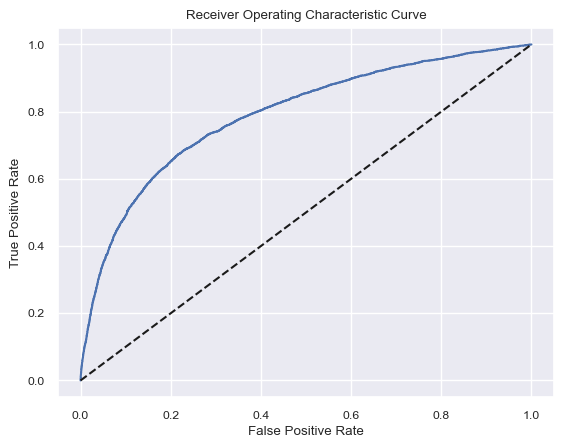

In [84]:
# roc curve
y_pred_proba = rf_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

#### Getting our ROC AUC Score as the metric this competition proposed to measure our model's performance

In [85]:
# roc auc score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7902229738276476


##### 0.7902 is pretty great for this task! now let's submit our model's results on the proposed test data for the competition.

## Submission

In [86]:
df_test_org = pd.read_csv('test.csv')
df_test_org.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.000000,5.000000,1.000000,4.000000,144.000000,824.820000,0.040000,26.960000,30.050000,...,1257.600000,30,0,3,0,21.000000,23.000000,87.000000,57.000000,9.000000
1,101764,27.000000,8.000000,8.000000,2.000000,125.000000,646.240000,0.040000,22.820000,27.220000,...,804.580000,23,0,2,0,18.000000,19.000000,70.000000,49.000000,15.000000
2,101765,130.000000,11.000000,7.000000,10.000000,545.000000,3831.400000,0.020000,48.150000,66.170000,...,6453.340000,99,9,17,1,26.000000,53.000000,333.000000,244.000000,21.000000
3,101766,65.000000,7.000000,1.000000,7.000000,156.000000,855.710000,0.060000,17.230000,49.890000,...,896.420000,45,8,10,0,15.000000,26.000000,88.000000,60.000000,13.000000
4,101767,22.000000,3.000000,1.000000,3.000000,52.000000,238.420000,0.100000,9.600000,26.700000,...,145.800000,16,0,4,0,12.000000,15.000000,30.000000,24.000000,5.000000


In [87]:
# select only the features that we used for training
df_test = df_test_org[X_train.columns]

In [91]:
# predicting the values
y_pred_test = rf_pipe.predict_proba(df_test)
# getting the positive class probabilities
y_pred_test = y_pred_test[:, 1]

In [92]:
# saving the predictions
df_submission = pd.DataFrame({'id': df_test_org['id'], 'defects': y_pred_test})
df_submission.to_csv('submission.csv', index=False)

In [93]:
df_submission.head(20)

,id,defects
0,101763,0.283111
1,101764,0.177130
2,101765,0.604668
3,101766,0.407093
4,101767,0.159537
5,101768,0.485797
6,101769,0.092344
7,101770,0.627196
8,101771,0.425210
9,101772,0.064896


#### Results with more than 0.5 are "True" meanwhile less than 0.5 are "False", since True(1) is our positive class.

## Great Work!